# Stock market prediction using historical and textual analysis

In [3]:
#importing liabraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import math
import seaborn as sns


In [4]:
df=pd.read_csv("GSPC.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000
...,...,...,...,...,...,...,...
4975,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3534.219971,3428970000
4976,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3511.929932,3605150000
4977,2020-10-14,3515.469971,3527.939941,3480.550049,3488.669922,3488.669922,3840630000
4978,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3483.340088,3717640000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03
mean,1644.797604,1654.172952,1634.592972,1645.017200,1645.017200,3.272782e+09
std,663.867441,665.903384,661.494154,663.946038,663.946038,1.474020e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1148.999970,1157.667480,1140.119995,1149.467499,1149.467499,2.076878e+09
50%,1363.604981,1369.195007,1355.225036,1364.110046,1364.110046,3.337025e+09
75%,2078.070007,2085.909912,2067.010010,2079.115051,2079.115051,4.038788e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10


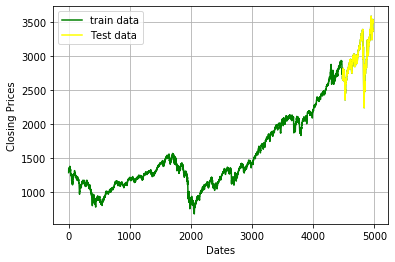

In [7]:
#train & test

train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'green', label= 'train data')
plt.plot(test_data['Close'], 'yellow', label= 'Test data')
plt.legend()

In [8]:
#arima
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4481
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18567.612
Method:                       css-mle   S.D. of innovations             15.252
Date:                Tue, 20 Oct 2020   AIC                          37141.224
Time:                        11:31:45   BIC                          37160.447
Sample:                             1   HQIC                         37147.999
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3067      0.213      1.441      0.150      -0.110       0.724
ma.L1.D.Close    -0.0661      0.016     -4.222      0.000      -0.097      -0.035
                                    Root

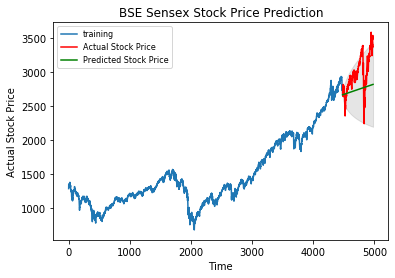

In [10]:
#prediction
fc, se, conf = fitted.forecast(498, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'red', label='Actual Stock Price')
plt.plot(fc_series, color = 'green',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [11]:
# Performance report
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 107536.746902914
MAE: 272.76243899844286
RMSE: 327.9279599285703
MAPE: 0.08809244241883206


In [12]:
from datetime import datetime
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alipta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alipta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alipta\AppData\Roaming\nltk_data...


True

In [14]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [15]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [19]:
df1 = pd.read_csv("india-news-headlines.csv")
df1

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [20]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [21]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'],format='%Y%m%d')

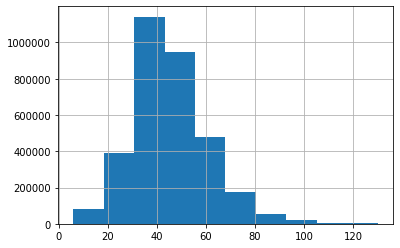

In [22]:
df1['headline_text'].str.len().hist()
plt.show()

In [23]:
df2 = df1[df1['publish_date']> '2005-06-29'].reset_index(drop=True)

In [24]:
df2.shape

(2941736, 3)

In [25]:
headline_cats = [cat for cat in df2['headline_category'].value_counts().index if 'business' in cat]

In [26]:
headline_cats

['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business',
 'india-business-news-wire',
 'business.faqs.income-tax-faqs',
 'business.mf-simplified.mf-news',
 'business.mf-simplified.jargon-busters.debt',
 'business.faqs.aadhar-faqs',
 'business.mf-simplified.jargon-busters.equity',
 'business.mf-simplified.faq',
 'business.faqs.gst-faqs']

In [27]:
df2 = df2.loc[df2['headline_category'].str.find('business') !=-1].reset_index(drop=True)

In [28]:
df2.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,BK Birla group pens Rs 1;000-cr investment plan
1,2005-07-01,business.india-business,Acquisitions are way forward: Paul
2,2005-07-01,business.india-business,Central PSUs get purchase preference in govt o...
3,2005-07-01,business.india-business,Govt removes hurdles for GM to buy Daewoo Indi...
4,2005-07-01,business.india-business,Anil Ambani to make it big in entertainment


In [29]:
df3 = df2.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()

In [30]:
df3.head

<bound method NDFrame.head of      publish_date        headline_category  \
0      2005-07-01  business.india-business   
1      2005-07-02  business.india-business   
2      2005-07-03  business.india-business   
3      2005-07-04  business.india-business   
4      2005-07-05  business.india-business   
...           ...                      ...   
5432   2020-06-26  business.india-business   
5433   2020-06-27  business.india-business   
5434   2020-06-28  business.india-business   
5435   2020-06-29  business.india-business   
5436   2020-06-30  business.india-business   

                                          headline_text  
0     BK Birla group pens Rs 1;000-cr investment pla...  
1     Retail boom triggers ancillary industry growth...  
2     India ideal for KPO industry. Airlines facing ...  
3     Global CEOs; Indian owners: Why the strains ar...  
4     Finolex Cables to forward integrate operations...  
...                                                 ...  
5432  Prefe

In [31]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo')['Adj Close']
df.comp.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2015-10-21,26.281809,24.426851,642.609985,112.848816,42.895134
2015-10-22,26.683798,25.044931,651.789978,115.387383,43.649437
2015-10-23,27.510878,24.985662,702.000000,115.859840,48.048008
2015-10-26,26.632969,25.019533,712.780029,115.042992,49.302139
2015-10-27,26.464319,24.943325,708.489990,110.398384,48.793213
2015-10-28,27.554773,24.884060,712.950012,112.776749,49.056763
2015-10-29,27.845867,24.841722,716.919983,112.552536,48.493317
2015-10-30,27.607912,24.486118,710.809998,112.176132,47.838978
2015-11-02,27.996040,24.892523,721.109985,112.408371,48.384258


In [32]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2015-10-21,NaN,NaN,NaN,NaN,NaN
2015-10-22,0.015295,0.025303,0.014285,0.022495,0.017585
2015-10-23,0.030996,-0.002367,0.077034,0.004095,0.100770
2015-10-26,-0.031911,0.001356,0.015356,-0.007050,0.026102
2015-10-27,-0.006332,-0.003046,-0.006019,-0.040373,-0.010323
2015-10-28,0.041205,-0.002376,0.006295,0.021543,0.005401
2015-10-29,0.010564,-0.001701,0.005568,-0.001988,-0.011486
2015-10-30,-0.008545,-0.014315,-0.008523,-0.003344,-0.013493
2015-11-02,0.014059,0.016597,0.014490,0.002070,0.011398


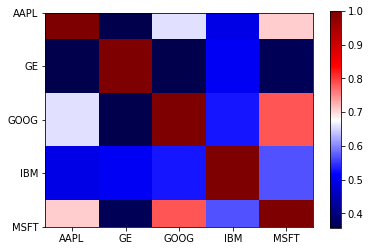

In [33]:
plt.imshow(corr, cmap = 'seismic', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [34]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Adj Close, dtype: float64

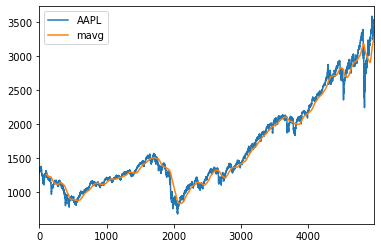

In [35]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

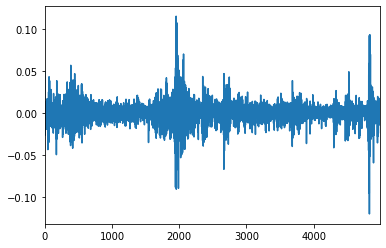

In [36]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

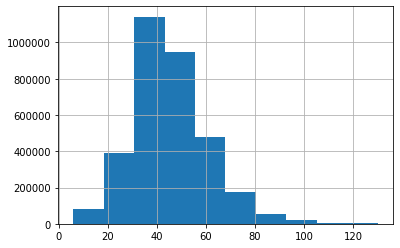

In [37]:
df1['headline_text'].str.len().hist()
plt.show()


In [38]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alipta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [40]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [41]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

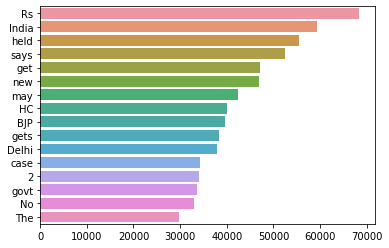

In [42]:
sns.barplot(x = y , y = x)
plt.show()